# Data Loading

In [13]:
# Required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

# Download the dataset and unzip it
dataset_path = '/content/drive/MyDrive/Hand/leapGestRecog.zip'
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Hand')


In [15]:
import os
import random
import glob
import pandas as pd
from PIL import Image


dataset_dir = '/content/drive/MyDrive/Hand/leapGestRecog'

# Get unique categories (folder names)
categories = os.listdir(dataset_dir)
print("Unique Categories:")
print(categories)


Unique Categories:
['03', '04', '05', '02', '07', '00', '09', '08', '01', '06']


In [16]:
import os
import random
import glob
import pandas as pd
from PIL import Image

dataset_dir = '/content/drive/MyDrive/Hand/leapGestRecog/01'

# Get unique categories (folder names)
categories = os.listdir(dataset_dir)
print("Unique Categories:")
print(categories)


Unique Categories:
['05_thumb', '08_palm_moved', '02_l', '01_palm', '07_ok', '10_down', '06_index', '09_c', '03_fist', '04_fist_moved']


In [17]:
import os

dataset_dir = '/content/drive/MyDrive/Hand/leapGestRecog'

# Walk through the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    for file in files:

        if file == '.DS_Store':
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f'Removed: {file_path}')

print("All .DS_Store files have been removed from the dataset.")


All .DS_Store files have been removed from the dataset.


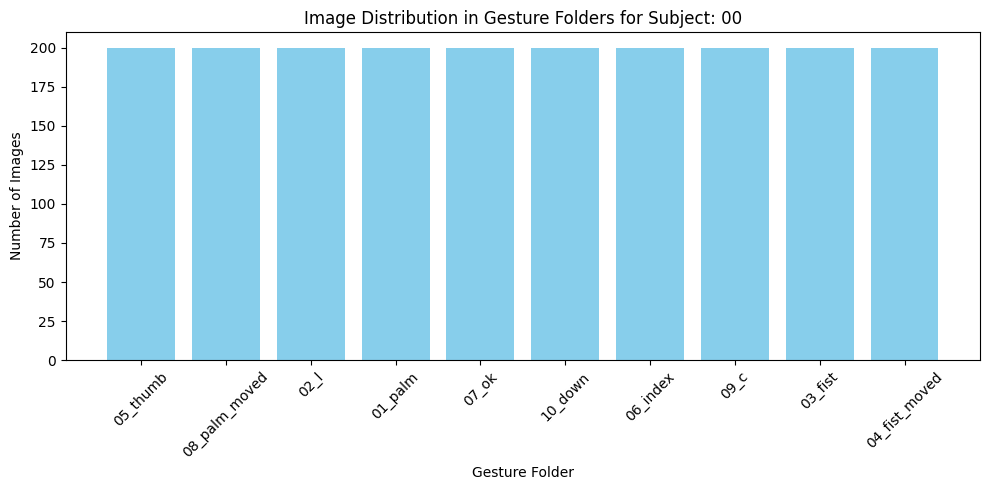

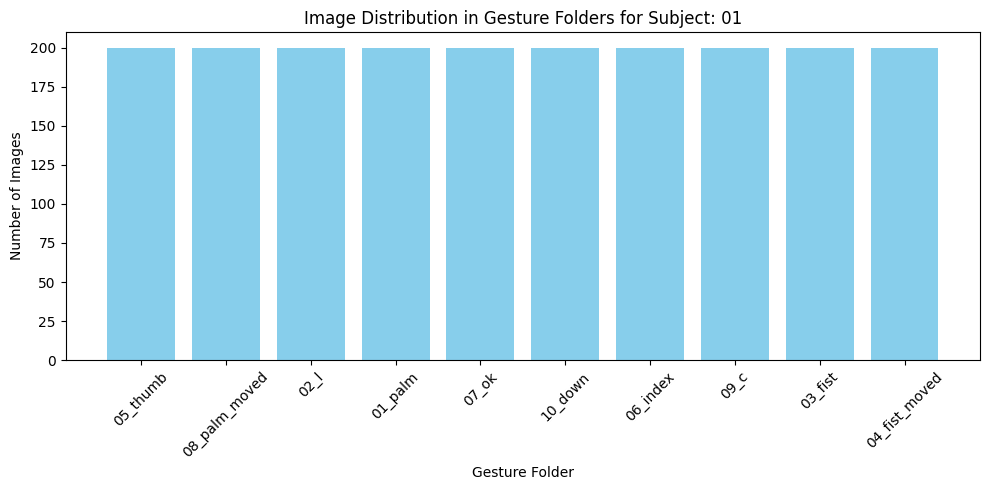

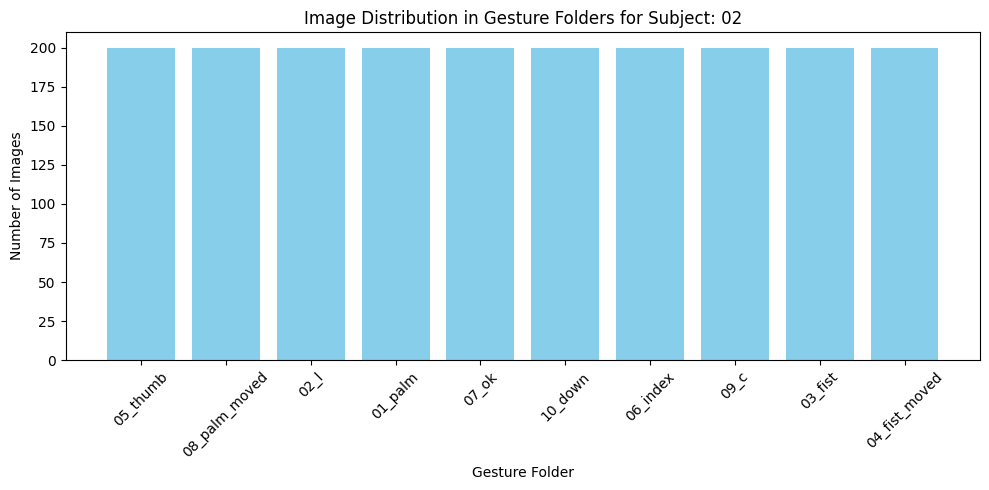

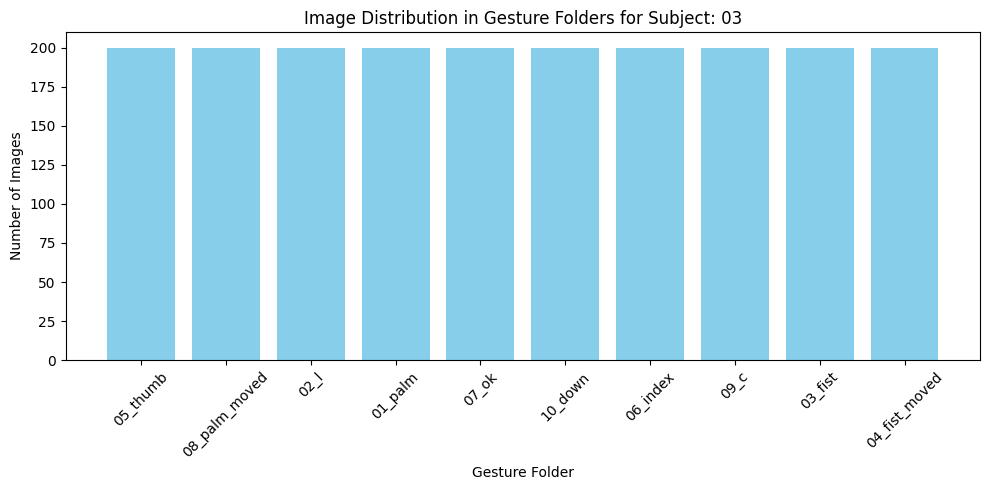

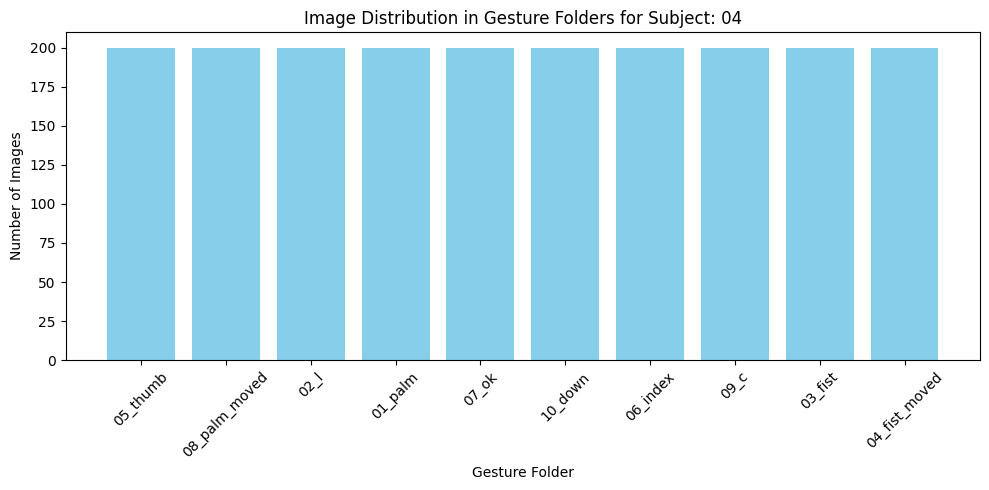

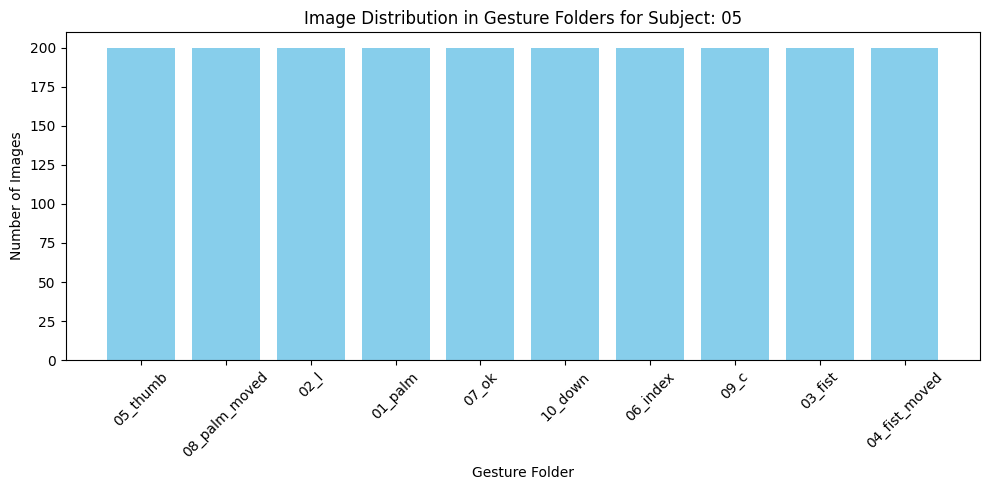

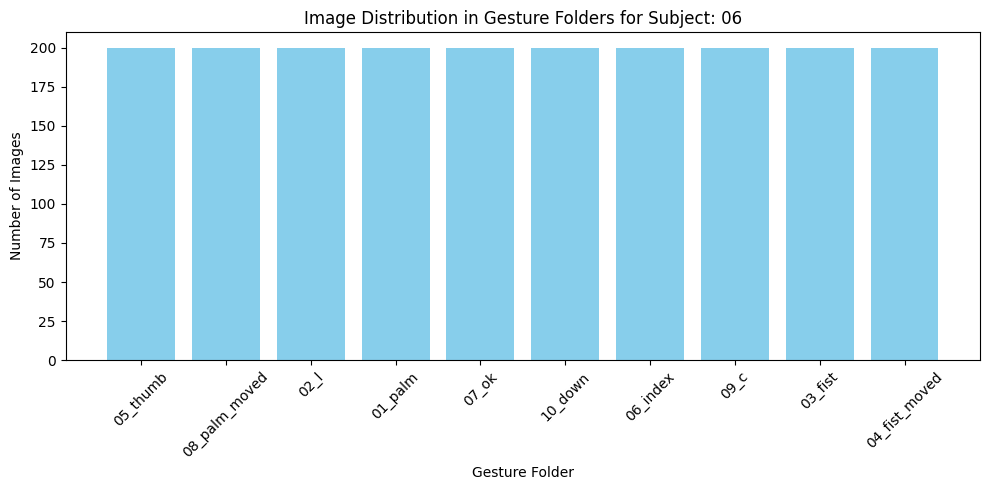

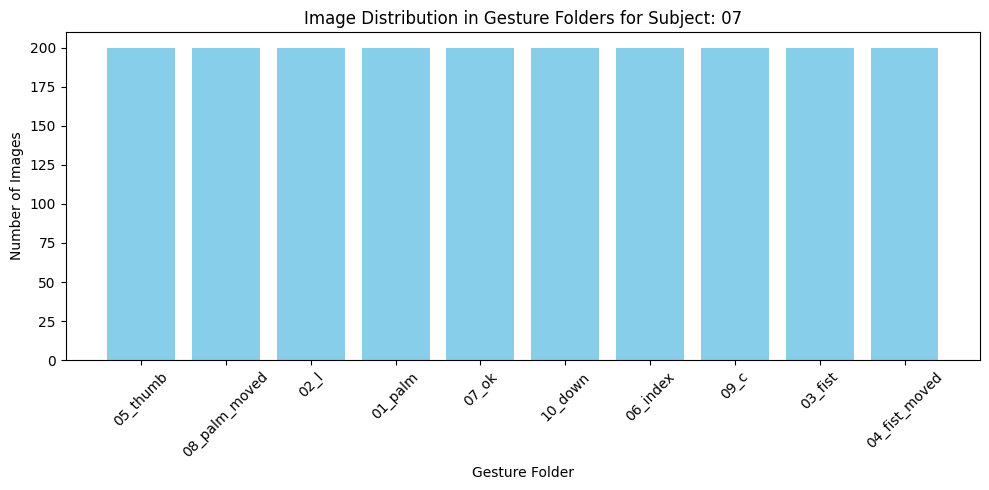

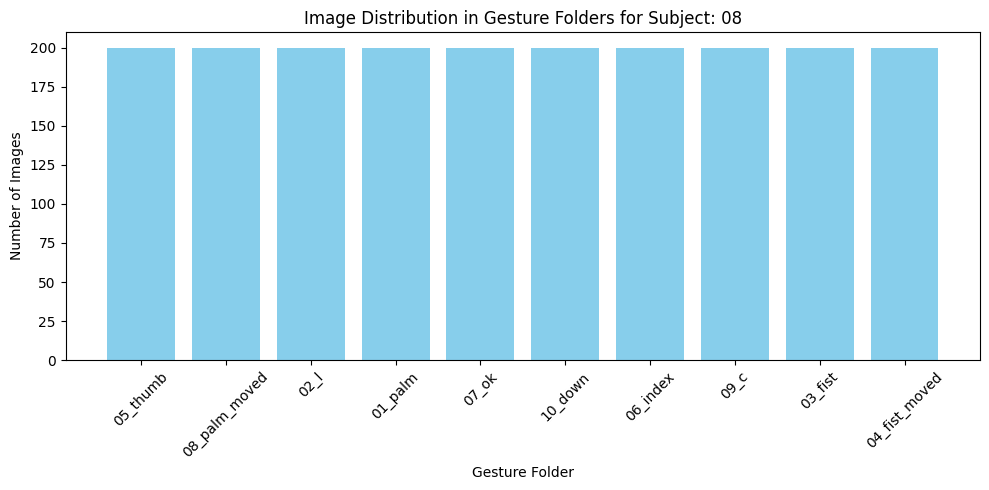

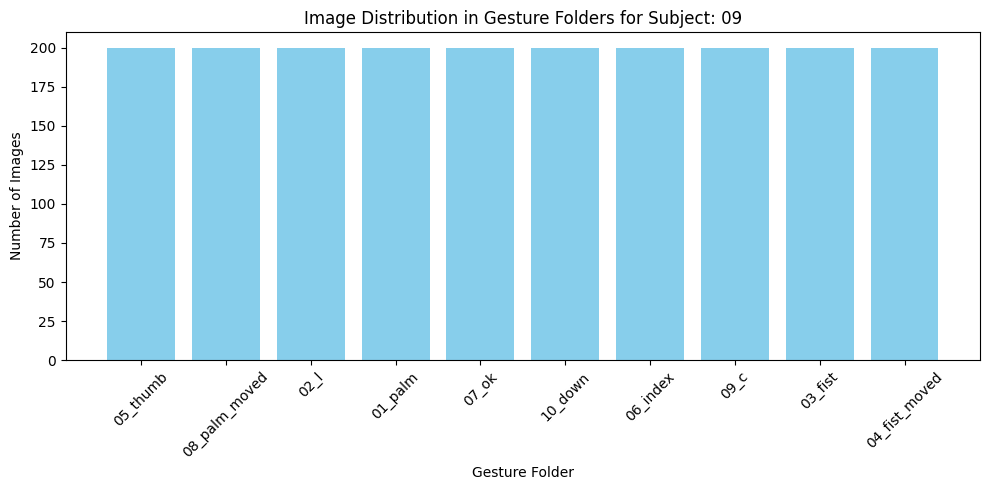

In [18]:
import os
import matplotlib.pyplot as plt


main_dir = '/content/drive/MyDrive/Hand/leapGestRecog'

# Loop through each subject folder (00 to 09)
for subject_folder in [f"{i:02d}" for i in range(10)]:
    subject_path = os.path.join(main_dir, subject_folder)


    if not os.path.exists(subject_path):
        print(f"The path {subject_path} does not exist. Skipping this subject.")
        continue


    gesture_counts = {}

    # Loop through each gesture folder within the current subject folder
    for gesture in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture)

        if os.path.isdir(gesture_path):

            num_images = len([img for img in os.listdir(gesture_path) if img.endswith('.png')])
            gesture_counts[gesture] = num_images

    # Plot the distribution of images across gesture folders for the current subject
    plt.figure(figsize=(10, 5))
    plt.bar(gesture_counts.keys(), gesture_counts.values(), color='skyblue')
    plt.title(f'Image Distribution in Gesture Folders for Subject: {subject_folder}')
    plt.xlabel('Gesture Folder')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Combine  hand gestures of people

In [7]:
import os
import shutil

main_dir = '/content/drive/MyDrive/Hand/leapGestRecog'

combined_gestures_dir = '/content/sample_data/combined_gestures'

os.makedirs(combined_gestures_dir, exist_ok=True)

# Loop through each subject folder (00 to 09)
for subject_folder in [f"{i:02d}" for i in range(10)]:
    subject_path = os.path.join(main_dir, subject_folder)


    if not os.path.exists(subject_path):
        print(f"The path {subject_path} does not exist. Skipping this subject.")
        continue


    for gesture in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture)

        if os.path.isdir(gesture_path):

            combined_gesture_path = os.path.join(combined_gestures_dir, gesture)
            os.makedirs(combined_gesture_path, exist_ok=True)


            images = [img for img in os.listdir(gesture_path) if img.endswith('.png')]


            for img in images:
                src_img_path = os.path.join(gesture_path, img)
                dst_img_path = os.path.join(combined_gesture_path, img)
                shutil.copy(src_img_path, dst_img_path)


print("Image copying completed. Check the combined gestures directory.")


Image copying completed. Check the combined gestures directory.


In [8]:
import os


combined_gestures_dir = '/content/sample_data/combined_gestures'


total_images = 0
gesture_counts = {}

# Loop through each gesture folder in the combined gestures directory
for gesture_folder in os.listdir(combined_gestures_dir):
    gesture_path = os.path.join(combined_gestures_dir, gesture_folder)

    if os.path.isdir(gesture_path):

        num_images = len([img for img in os.listdir(gesture_path) if img.endswith('.png')])
        total_images += num_images


        gesture_counts[gesture_folder] = num_images


print(f"Total number of images in the combined gestures folder: {total_images}")
for gesture, count in gesture_counts.items():
    print(f"Number of images in '{gesture}' folder: {count}")


Total number of images in the combined gestures folder: 20000
Number of images in '04_fist_moved' folder: 2000
Number of images in '02_l' folder: 2000
Number of images in '08_palm_moved' folder: 2000
Number of images in '05_thumb' folder: 2000
Number of images in '09_c' folder: 2000
Number of images in '01_palm' folder: 2000
Number of images in '03_fist' folder: 2000
Number of images in '07_ok' folder: 2000
Number of images in '10_down' folder: 2000
Number of images in '06_index' folder: 2000


# EDA

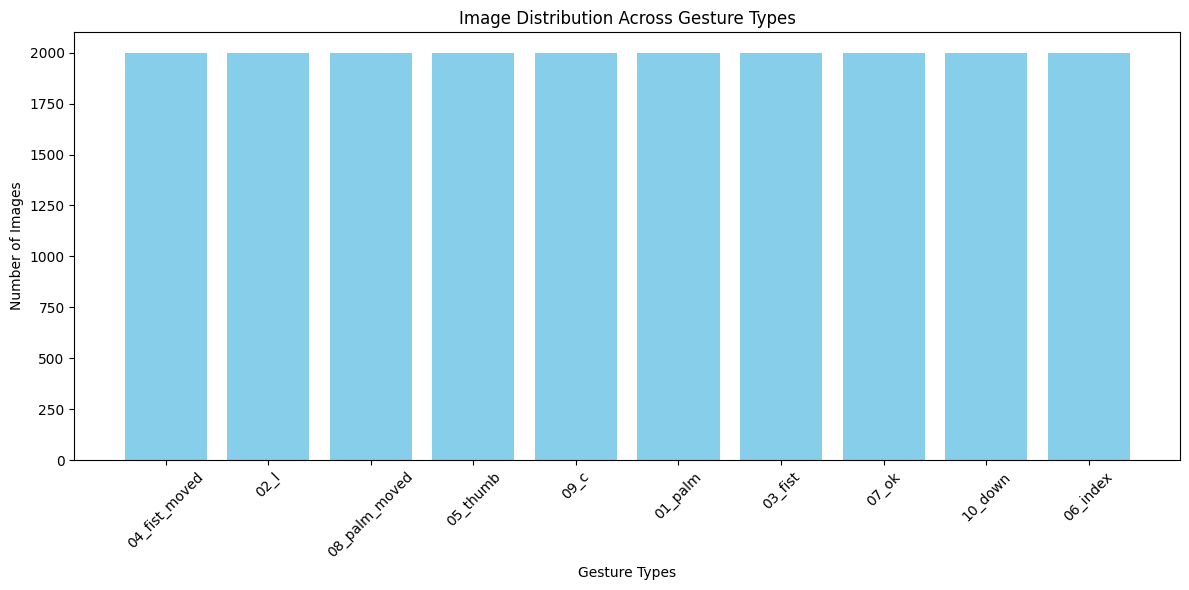

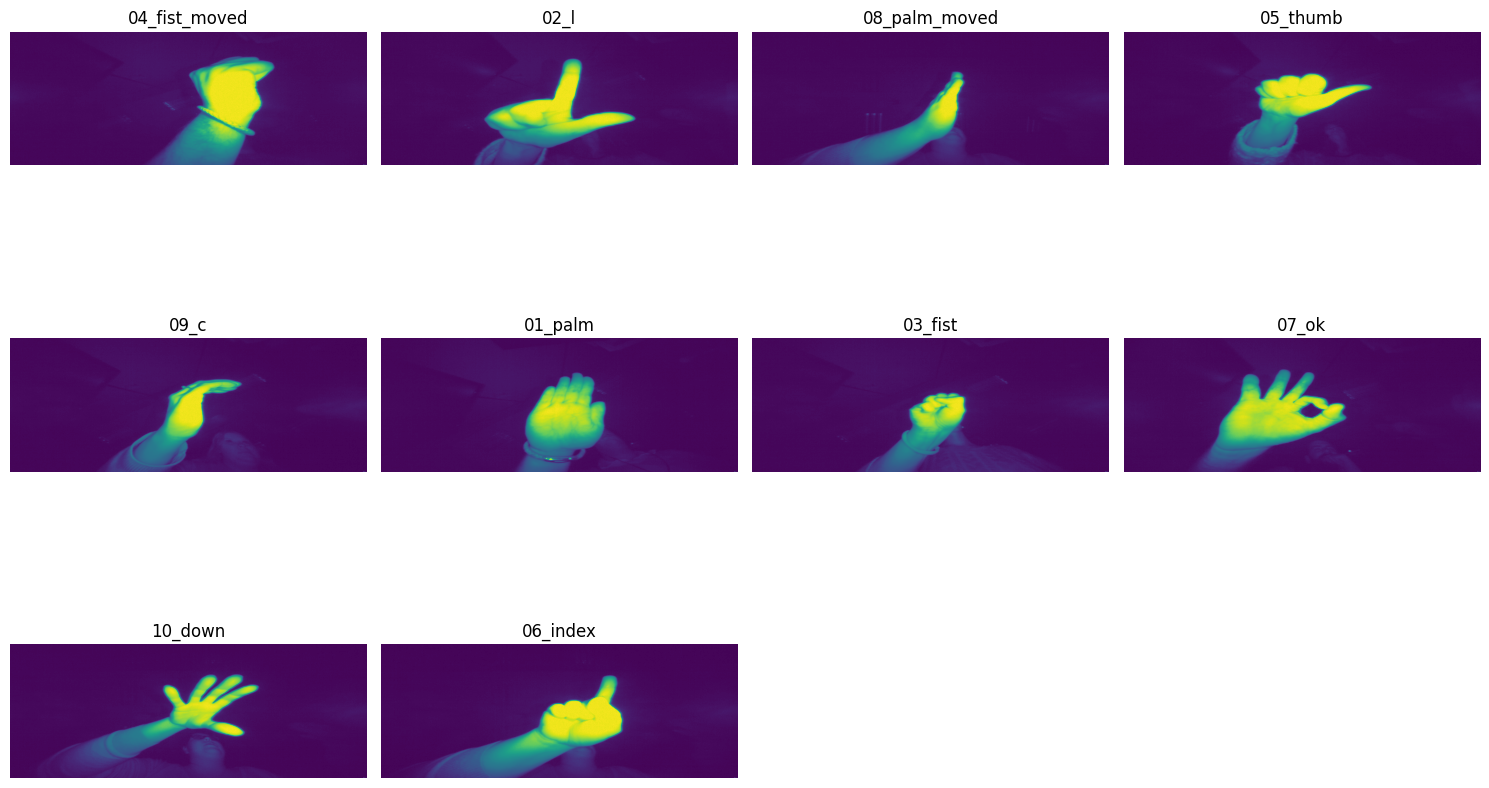

Counts of images per gesture:
04_fist_moved: 2000 images
02_l: 2000 images
08_palm_moved: 2000 images
05_thumb: 2000 images
09_c: 2000 images
01_palm: 2000 images
03_fist: 2000 images
07_ok: 2000 images
10_down: 2000 images
06_index: 2000 images


In [9]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image


combined_gestures_dir = '/content/sample_data/combined_gestures'



gesture_counts = {}
sample_images = {}

# Loop through each gesture folder in the combined gestures directory
for gesture_folder in os.listdir(combined_gestures_dir):
    gesture_path = os.path.join(combined_gestures_dir, gesture_folder)

    if os.path.isdir(gesture_path):

        num_images = len([img for img in os.listdir(gesture_path) if img.endswith('.png')])
        gesture_counts[gesture_folder] = num_images


        images = [img for img in os.listdir(gesture_path) if img.endswith('.png')]
        sample_images[gesture_folder] = random.sample(images, min(5, len(images)))  # Sample up to 5 images

plt.figure(figsize=(12, 6))
plt.bar(gesture_counts.keys(), gesture_counts.values(), color='skyblue')
plt.title('Image Distribution Across Gesture Types')
plt.xlabel('Gesture Types')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, (gesture, images) in enumerate(sample_images.items()):
    plt.subplot(3, 4, i + 1)
    img_path = os.path.join(combined_gestures_dir, gesture, images[0])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(gesture)
    plt.axis('off')
plt.tight_layout()
plt.show()


print("Counts of images per gesture:")
for gesture, count in gesture_counts.items():
    print(f"{gesture}: {count} images")


# Data Preprocessing

In [10]:

combined_data_dir = '/content/sample_data/combined_gestures'



IMG_SIZE = 64
BATCH_SIZE = 32

data = []
labels = []


for gesture in os.listdir(combined_data_dir):
    gesture_path = os.path.join(combined_data_dir, gesture)
    if os.path.isdir(gesture_path):
        for img_name in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img_name)
            if img_path.endswith(('.png', '.jpg', '.jpeg')):
                data.append(img_path)
                labels.append(gesture)


In [11]:

dataframe = pd.DataFrame({'filename': data, 'class': labels})


label_encoder = LabelEncoder()
dataframe['class_encoded'] = label_encoder.fit_transform(dataframe['class'])


train_df, val_df = train_test_split(dataframe, test_size=0.2, stratify=dataframe['class'], random_state=42)


In [12]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Randomly zoom images
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest',     # Fill in new pixels created during transformations
    validation_split=0.2     # Reserve 20% of the data for validation
)

# Step 6: Create training generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
)


validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
)


Found 16000 validated image filenames belonging to 10 classes.
Found 4000 validated image filenames belonging to 10 classes.


# Modeling

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_complex_model(input_shape, num_classes):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Block 4
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))


    model.add(layers.Flatten())


    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model



In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models


input_shape = (32, 32, 3)
num_classes = 10
complex_model = create_complex_model(input_shape, num_classes)


complex_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 922,314 (3.52 MB)

 Trainable params: 920,330 (3.51 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [29]:
# Compile the model
complex_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoded labels
                      metrics=['accuracy'])


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,                   # Stop training after 3 epochs with no improvement
    restore_best_weights=True
)

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)


history = complex_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 164s 312ms/step - accuracy: 0.2500 - loss: 2.6109 - val_accuracy: 0.2075 - val_loss: 3.5979
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 189s 290ms/step - accuracy: 0.5873 - loss: 1.1407 - val_accuracy: 0.7940 - val_loss: 0.5837
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 277ms/step - accuracy: 0.7240 - loss: 0.7688 - val_accuracy: 0.8622 - val_loss: 0.4120
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 290ms/step - accuracy: 0.7932 - loss: 0.5901 - val_accuracy: 0.9125 - val_loss: 0.2681
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 280ms/step - accuracy: 0.8226 - loss: 0.4910 - val_accuracy: 0.9247 - val_loss: 0.2249
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 286ms/step - accuracy: 0.8413 - loss: 0.4367 - val_accuracy: 0.9425 - val_loss: 0.1716
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 288ms/step - accuracy: 0.8645 - loss: 0.3936 - val_accuracy: 0.9355 - val_loss: 0.1841
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 276ms/step - accuracy: 0.8765 - loss: 0.36

In [31]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = load_model('best_model.keras')


In [32]:
# Basic evaluation
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.9850 - loss: 0.0463
Validation Loss: 0.0439
Validation Accuracy: 0.9860


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicted class: 07_ok
Predictions (probabilities): [[1.9144842e-15 7.1468786e-13 9.2057912e-16 5.7353848e-14 9.9888045e-13
  6.4245884e-14 9.9999988e-01 1.0428192e-10 7.5835471e-09 9.5914075e-08]]


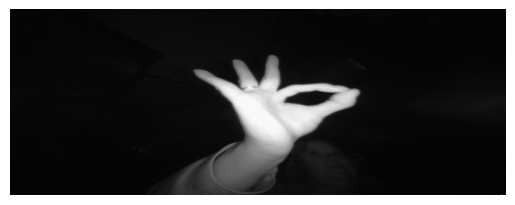

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image


model = load_model('best_model.keras')

def load_and_preprocess_image(img_path, target_size=(IMG_SIZE, IMG_SIZE)):

    img = image.load_img(img_path, target_size=target_size)

    img_array = image.img_to_array(img)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):

    processed_image = load_and_preprocess_image(img_path)


    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]
    return predicted_class_label, predictions


test_image_path = '/content/drive/MyDrive/Hand/combined_gestures/07_ok/frame_02_07_0066.png'


predicted_class, predictions = predict_image(test_image_path)

print(f'Predicted class: {predicted_class}')
print('Predictions (probabilities):', predictions)


img = image.load_img(test_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
